# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries

import pandas as pd
import numpy as np
import random as rd
import math

import matplotlib.pyplot as plt
import seaborn as sns


## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
def roll_the_dice(number_of_rolls):
    return rd.choices([i for i in range(1,6)], k = number_of_rolls)

df = pd.DataFrame(roll_the_dice(10), columns=['dice_results'])
df.shape

(10, 1)

#### 2.- Plot the results sorted by value.

In [3]:
df.sort_values(by=['dice_results'])

,dice_results
1,1
4,1
5,2
2,3
3,3
8,3
9,3
0,4
7,4
6,5


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [4]:
df['dice_results'].value_counts()

3    4
4    2
1    2
5    1
2    1
Name: dice_results, dtype: int64

*COMMENT:* Sort by value show all ocurrences while value_counts() shows de quantity of ocurrences by value.
Sort_values works with DataFrames while Value_Counts is only for Series

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [5]:
def mean_by_sum(series):
    return np.sum(series.tolist())/series.size

In [6]:
mean_by_sum(df['dice_results']) == df['dice_results'].mean()

True

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
def mean_by_frec_distr(series):
    series_mult = [i*j for i,j in zip(series.value_counts().index.tolist(), series.value_counts().tolist())]
    return np.sum(series_mult) / series.size

In [8]:
mean_by_frec_distr(df['dice_results']) == df['dice_results'].mean()

True

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [77]:
def median_by_lenght(sorted_list):
    middle_float = len(sorted_list)/2
    
    if len(sorted_list) % 2 == 0:
        indices = [int(middle_float)-1, int(middle_float)]
        
    else:
        indices = [int(math.floor(middle_float)), int(math.ceil(middle_float))]
        
    middle_values = [sorted_list[indices[0]], sorted_list[indices[1]]]                     
    return [np.sum(middle_values)/len(middle_values), indices]

In [10]:
sorted_list = df['dice_results'].sort_values().tolist()

median_by_lenght(sorted_list)[0] == np.median(df['dice_results'])

True

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [11]:
def quartiles_by_length(series, quantiles):
    dict_quartiles = dict(zip(['lower_quartile', 'median', 'upper_quartile'], 
                              [series.size*num for num in quantiles]
                             ))
    bool_quartiles = [bool((val*2) % 2 == 0) for val in dict_quartiles.values()]
    
    for k,bool_val in enumerate(bool_quartiles):
        middle_value = list(dict_quartiles.values())[k]
        
        if bool_val:
            series_val = [series.sort_values().iloc[int(middle_value) -1], 
                          series.sort_values().iloc[int(middle_value)]]
            yield [list(dict_quartiles.keys())[k], np.sum(series_val)/len(series_val)]
        
        else:
            series_val = [series.sort_values().iloc[int(math.floor(middle_value))], 
                         series.sort_values().iloc[int(math.ceil(middle_value))]]
            
            yield [list(dict_quartiles.keys())[k], np.sum(series_val)/len(series_val)]

In [12]:
dict_quartiles = {val[0]:val[1] for val in quartiles_by_length(df['dice_results'], [.25, .5, 0.75])}
print(f'My result \t{list(dict_quartiles.values())}')

# COMPARING W/ PANDAS AND NUMPY
pandas_quartiles = df['dice_results'].sort_values().quantile([0.25, 0.5, 0.75]).tolist()
numpy_quartiles = [np.percentile(df['dice_results'].sort_values().tolist(), 25),
                   np.percentile(df['dice_results'].sort_values().tolist(), 50),
                   np.percentile(df['dice_results'].sort_values().tolist(), 75)]

print(f"PANDAS \t\t{pandas_quartiles}")
print(f"NUMPY \t\t{numpy_quartiles}")

My result 	[2.5, 3.0, 4.0]
PANDAS 		[2.25, 3.0, 3.75]
NUMPY 		[2.25, 3.0, 3.75]


In [13]:
"""
Dear TA: Looking in internet why my result was wrong in comparison to Pandas/Numpy, 
apparently some people have an issue with it too.

An alternative that might be ok is using the median function that I have create beforehand and subdividing the list, 
but in only works for Q1 and Q3.

https://stackoverflow.com/questions/45926230/how-to-calculate-1st-and-3rd-quartiles/45926291
"""

sorted_list = df['dice_results'].sort_values().tolist()

median, median_indices = median_by_lenght(sorted_list)

Q1 = median_by_lenght(sorted_list[:median_indices[0]])[0]
Q3 = median_by_lenght(sorted_list[median_indices[-1] + 1:])[0]

quartiles = {k:val for k,val in zip(['Q1', 'median', 'Q3'], [Q1, median, Q3])}
quartiles

{'Q1': 1.5, 'median': 3.0, 'Q3': 4.0}

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [14]:
path = '../data/roll_the_dice_hundred.csv'

df = pd.read_csv(path)
print(df.shape)
df.head(2)

(100, 3)


,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2


In [15]:
df.sort_values(by=['value'])

,Unnamed: 0,roll,value
0,0,0,1
47,47,47,1
56,56,56,1
9,9,9,1
73,73,73,1
...,...,...,...
17,17,17,6
11,11,11,6
24,24,24,6
21,21,21,6


In [16]:
df.drop(['Unnamed: 0', 'roll'], axis=1, inplace= True)
df['value'].value_counts()

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

In [17]:
"""
Unnamed and roll are repeated index values;
6 and 4 are the most repeated values
"""
df.head(2)

,value
0,1
1,2


#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [18]:
mean_by_sum(series = df['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [19]:
mean_by_frec_distr(series = df['value'])

3.74

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

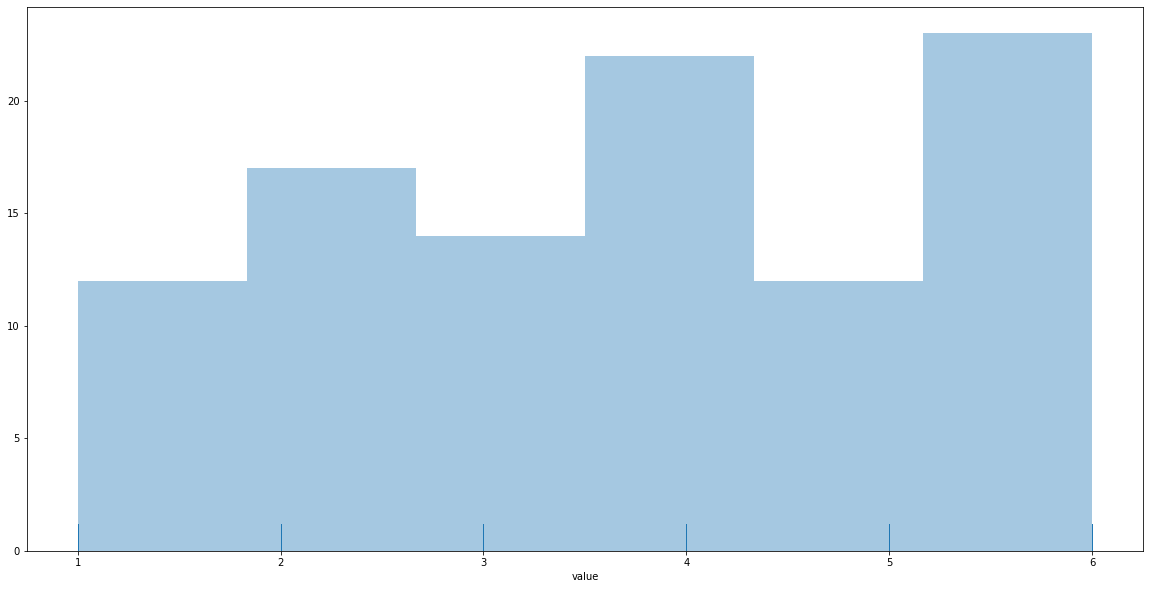

In [44]:
fig = plt.figure(figsize = (20,10))
ax = sns.distplot(df['value'], bins=6, kde=False, rug=True)

fig.show()

In [46]:
"""Even numbers have a higher probability to appear in the list"""

'Even numbers have a higher probability to appear in the list'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [49]:
path = '../data/roll_the_dice_thousand.csv'

df = pd.read_csv(path)
print(df.shape)

df.drop(['Unnamed: 0', 'roll'], axis=1, inplace= True)
df.head(5)

(1000, 3)


,value
0,5
1,6
2,1
3,6
4,5


In [50]:
df['value'].value_counts()

3    175
1    175
4    168
2    167
6    166
5    149
Name: value, dtype: int64

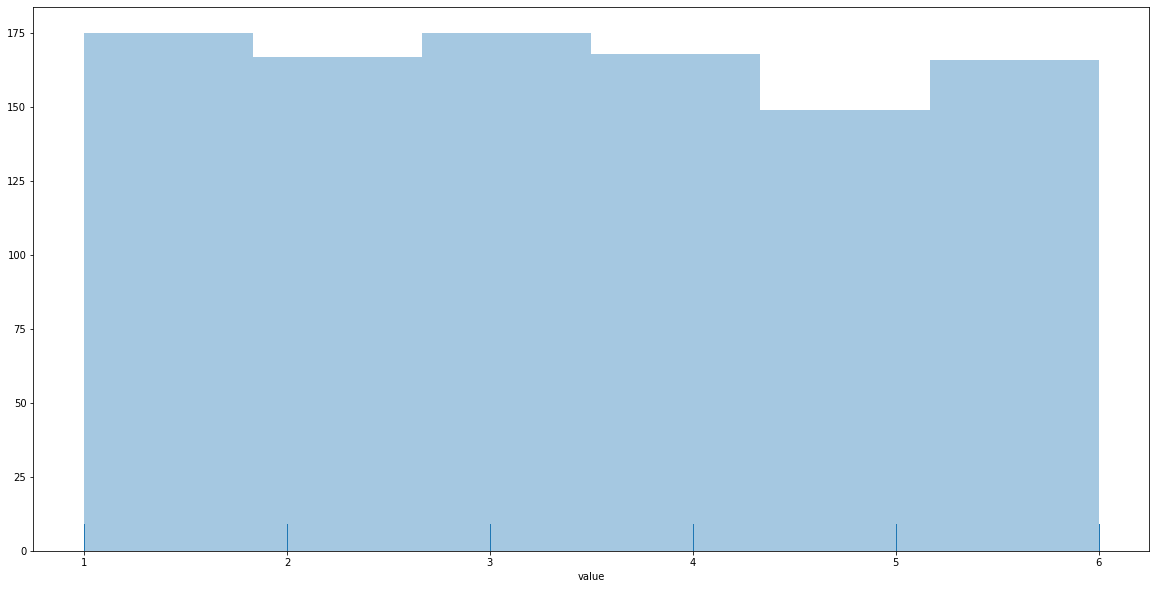

In [52]:
fig = plt.figure(figsize = (20,10))
ax = sns.distplot(df['value'], bins=6, kde=False, rug=True)

fig.show()

In [51]:
"""Data distribution is different, variation in distribution is smaller in comparizon to df size"""

'Data distribution is different, variation in distribution is smaller in comparizon to df size'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [58]:
path = '../data/ages_population.csv'

df_population1 = pd.read_csv(path)
print(df_population1.shape)

df_population1['observation'].value_counts()

(1000, 1)


39.0    45
41.0    36
30.0    34
35.0    33
43.0    32
        ..
70.0     1
71.0     1
7.0      1
69.0     1
73.0     1
Name: observation, Length: 72, dtype: int64

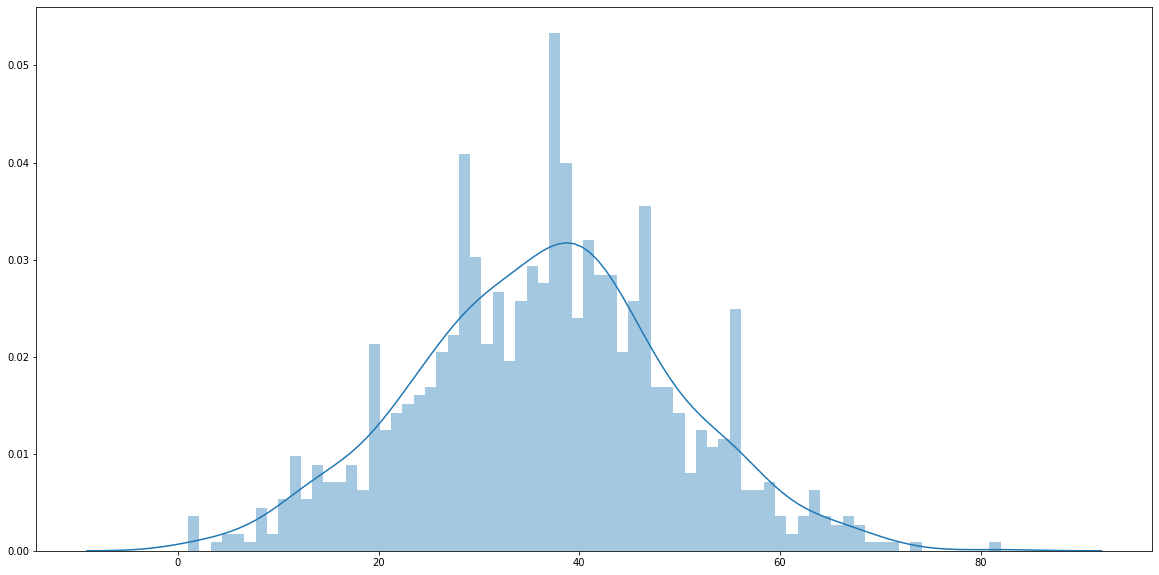

In [62]:
fig = plt.figure(figsize = (20,10))
ax = sns.distplot(df_population1, bins=df_population1['observation'].value_counts().size, kde=True, rug=False)

fig.show()

In [63]:
"""Mean appears to be between 32..40 and the standart deviation 10?"""

'Mean appears to be between 32..40 and the standart deviation 10?'

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [64]:
df_population1.mean()

observation    36.56
dtype: float64

In [65]:
df_population1.std()

observation    12.8165
dtype: float64

In [66]:
"""Near enough"""

'Near enough'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [67]:
path = '../data/ages_population2.csv'

df_population2 = pd.read_csv(path)
print(df_population2.shape)

df_population2['observation'].value_counts()

(1000, 1)


28.0    139
27.0    125
26.0    120
29.0    115
25.0     98
30.0     90
24.0     78
31.0     61
23.0     41
22.0     35
32.0     31
33.0     22
21.0     17
20.0     13
34.0      7
35.0      3
19.0      3
36.0      2
Name: observation, dtype: int64

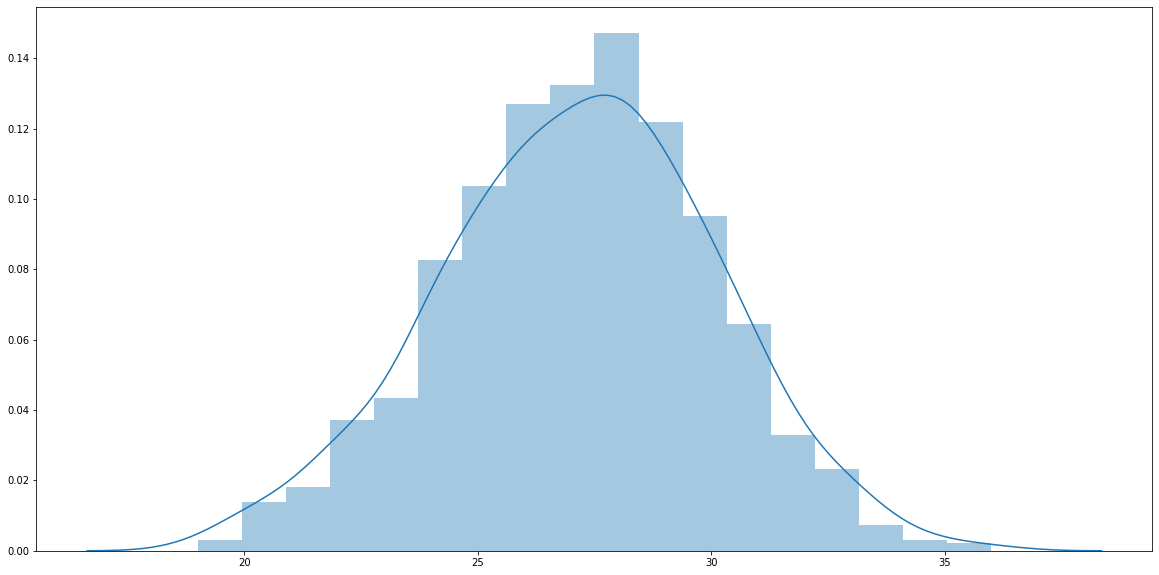

In [68]:
fig = plt.figure(figsize = (20,10))
ax = sns.distplot(df_population2, bins=df_population2['observation'].value_counts().size, kde=True, rug=False)

fig.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [69]:
"""Distribution is more typical gaussian, with less noise and less unique values"""

'Distribution is more typical gaussian, with less noise and less unique values'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [70]:
print(df_population2.mean())
print(df_population2.std())

observation    27.155
dtype: float64
observation    2.969814
dtype: float64


In [30]:
"""Mean is clearer to see, the std is much lower than the other df, which means that the slope of the curve is bigger"""

'\nyour comments here\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [71]:
path = '../data/ages_population3.csv'

df_population3 = pd.read_csv(path)
print(df_population3.shape)

df_population3['observation'].value_counts()

(1000, 1)


32.0    37
35.0    31
37.0    31
39.0    29
36.0    26
        ..
76.0     1
9.0      1
1.0      1
5.0      1
7.0      1
Name: observation, Length: 75, dtype: int64

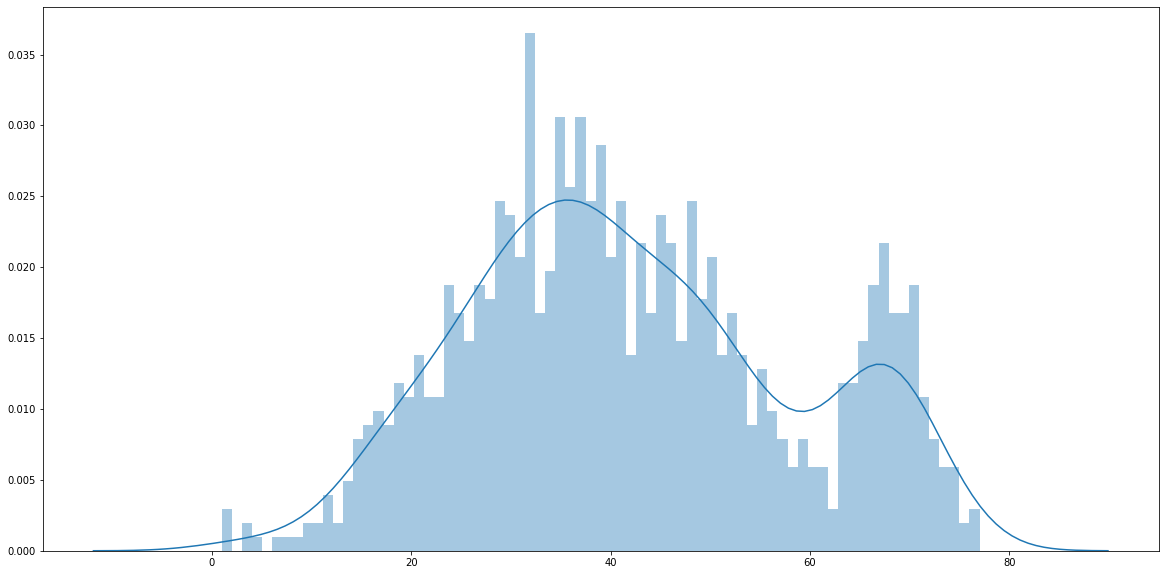

In [72]:
fig = plt.figure(figsize = (20,10))
ax = sns.distplot(df_population3, bins=df_population3['observation'].value_counts().size, kde=True, rug=False)

fig.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [73]:
print(df_population3.mean())
print(df_population3.std())

observation    41.989
dtype: float64
observation    16.144706
dtype: float64


In [74]:
"""
The mean is less obvious due to its distribution; it is on a value with a negative slope, when the other cases the slope was 0 (derivate = 0)
The STD is bigger because data distribution is sparser than the abovementioned case
"""

'\nThe mean is less obvious due to its distribution; it is on a value with a negative slope, when the other cases the slope was 0 (derivate = 0)\nThe STD is bigger because data distribution is sparser than the abovementioned case\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [75]:
df_population3['observation'].sort_values().quantile([0.25, 0.5, 0.75])

0.25    30.0
0.50    40.0
0.75    53.0
Name: observation, dtype: float64

In [78]:
sorted_list = df_population3['observation'].sort_values().tolist()

median, median_indices = median_by_lenght(sorted_list)

Q1 = median_by_lenght(sorted_list[:median_indices[0]])[0]
Q3 = median_by_lenght(sorted_list[median_indices[-1] + 1:])[0]

quartiles = {k:val for k,val in zip(['Q1', 'median', 'Q3'], [Q1, median, Q3])}
quartiles

{'Q1': 30.0, 'median': 40.0, 'Q3': 53.0}

In [79]:
dict_quartiles = {val[0]:val[1] for val in quartiles_by_length(df['observation'], [.25, .5, 0.75])}
print(f'My result \t{list(dict_quartiles.values())}')

My result 	[30.0, 40.0, 53.0]


In [80]:
"""
In this case, there size of the DF is big enough so that there is not a difference in calculations!
(Also might be related with results being integers)

The first top definitively sets the statistical quartiles and having the second top to the right moves values a little towards the right

There is a difference of 40-41.98 = 1.98 between median and mean, being bigger the mean.
This means that there is more data on the right (upper half) of the median than on its left.

"""

'\nIn this case, there size of the DF is big enough so that there is not a difference in calculations!\n(Also might be related with results being integers)\n\nThe first top definitively sets the statistical quartiles and having the second top to the right moves values a little towards the right\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [83]:
"""Minimun and Maximun to complete the data offered in .describe() method"""

'Minimun and Maximun to complete the data offered in .describe() method'

In [84]:
print(df.min())
print(df.max())

observation    1.0
dtype: float64
observation    77.0
dtype: float64


## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [38]:
# your code here

In [39]:
"""
your comments here
"""

'\nyour comments here\n'